In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [230]:
path = r"C:\Users\HAMMAD\Desktop\ids\labels.csv"
df_train = pd.read_csv(path,names=['imgno','text_ocr','text_corrected','overall_sentiment'])

df_train.drop(index=df_train.index[1],axis=1, inplace=True)
df=df_train[:400]

testdata=pd.DataFrame(df_train[500:1000])
testdata.columns=['imgno','text_ocr','text_corrected','overall_sentiment']

testdata.head()
df.isnull().count()

imgno                401
text_ocr             401
text_corrected       401
overall_sentiment    401
dtype: int64

In [232]:
df.isnull().sum()

imgno                0
text_ocr             6
text_corrected       1
overall_sentiment    0
dtype: int64

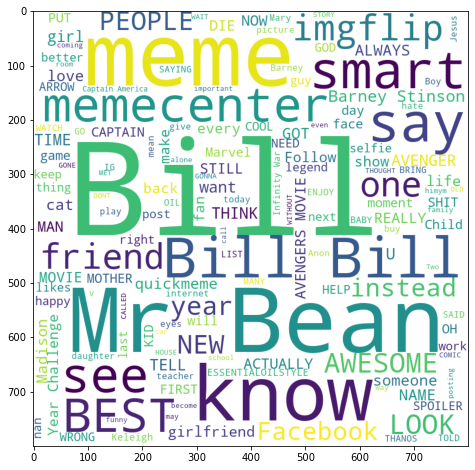

In [233]:
import nltk
from wordcloud import WordCloud

values = ' '.join(str(v) for v in df['text_ocr'])

word_cloud = WordCloud().generate(values)

word_cloud = WordCloud(width=800,height=800,
                       background_color='white',
                       max_words=150).\
generate(values)

plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [234]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [235]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus
corpus = text_transformation(df['text_ocr'])

In [236]:
bb = ' '.join(str(v) for v in df['text_ocr'])
word_cloud = WordCloud(width=800,height=800,background_color='black',max_words=200).\
generate(bb)

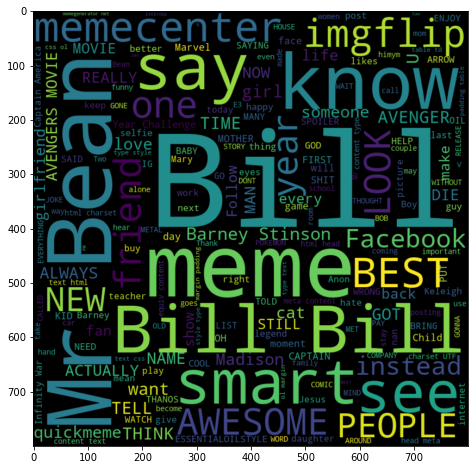

In [237]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

In [238]:
from sklearn.feature_extraction.text import CountVectorizer

unigram_count_vectorizer = CountVectorizer(max_features=2000)
Input_unigram = unigram_count_vectorizer.fit_transform(df['text_ocr'].values.astype(str))
DTM_unigram = pd.DataFrame(Input_unigram.toarray(),columns = unigram_count_vectorizer.get_feature_names())
DTM_sum_uni = DTM_unigram.sum().sort_values(ascending=False)
temp2 = DTM_sum_uni.reset_index()

temp2.columns = ['text_ocr','count']
temp2.head(5)

C:\Users\talha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,text_ocr,count
0,the,177
1,bill,151
2,is,126
3,you,114
4,to,109


C:\Users\talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


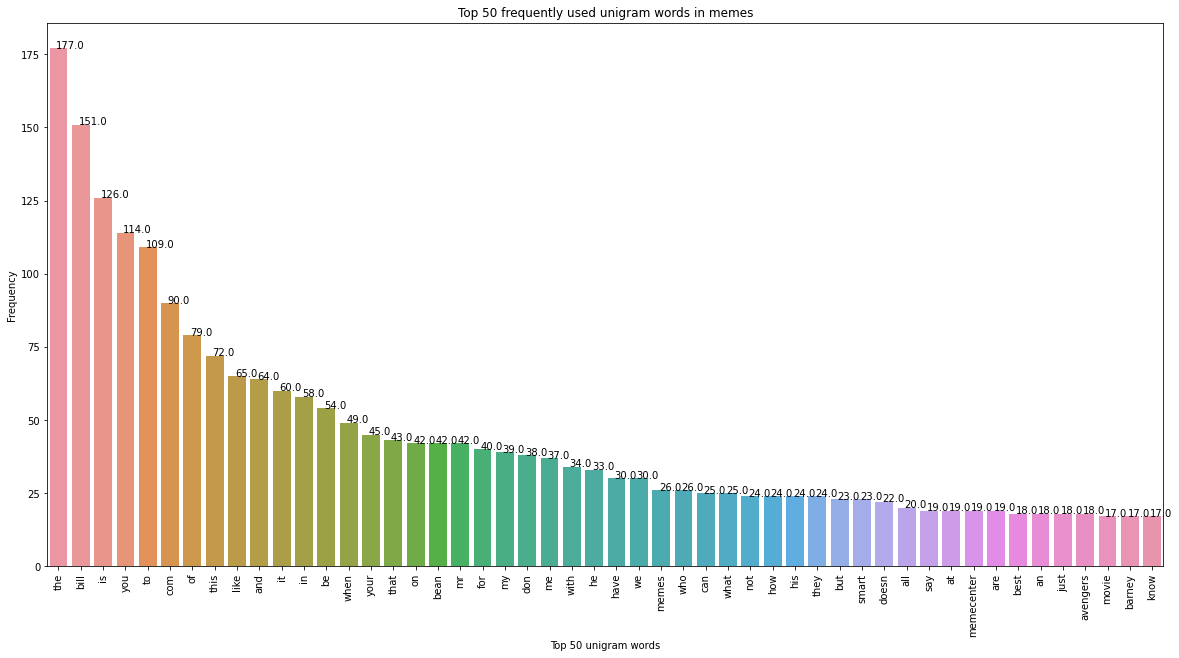

In [239]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.figure(figsize =(20,10))
plot = sb.barplot(DTM_sum_uni.head(50).index,DTM_sum_uni.head(50).values)
plt.xticks(rotation=90)
plt.xlabel('Top 50 unigram words')
plt.ylabel('Frequency')
plt.title('Top 50 frequently used unigram words in memes')

for p in plot.patches:
        plot.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()))

plt.show()

In [240]:
from sklearn.feature_extraction.text import CountVectorizer

bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features=200)

Input_bigram = bigram_count_vectorizer.fit_transform(df['text_ocr'].values.astype(str))

DTM_bigram = pd.DataFrame(Input_bigram.toarray(),columns = bigram_count_vectorizer.get_feature_names())
DTM_bigram.head()

C:\Users\talha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10 year,10 years,9gag com,about the,all the,an arrow,and have,and you,anon 2018,arrow for,...,you are,you can,you don,you get,you have,you just,you know,you re,your mother,your own
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
DTM_sum = DTM_bigram.sum().sort_values(ascending=False)
temp1 = DTM_sum.head(5).reset_index()
temp1.columns = ['text_ocr','count']
temp1.head(5)

,text_ocr,count
0,mr bean,38
1,this is,38
2,be like,30
3,is bill,28
4,bill is,27


C:\Users\talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


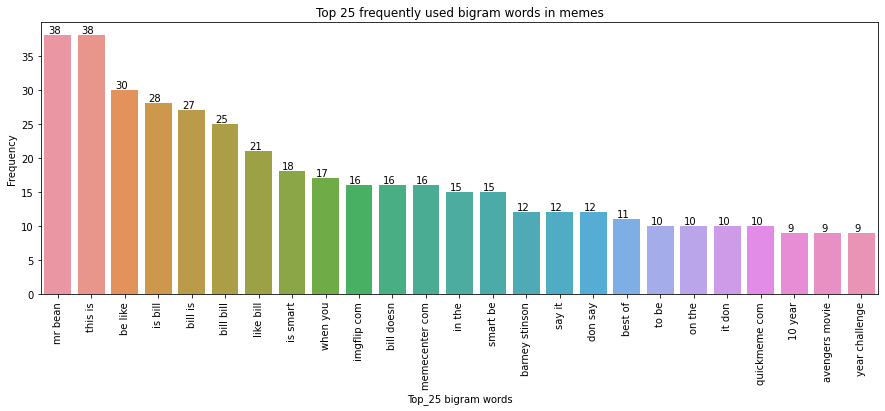

In [242]:
import matplotlib.pyplot as plt
import seaborn as sb

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.figure(figsize =(15,5))
plot = sb.barplot(DTM_sum.head(25).index,DTM_sum.head(25).values)
plt.xticks(rotation=90)
plt.xlabel('Top_25 bigram words')
plt.ylabel('Frequency')
plt.title('Top 25 frequently used bigram words in memes')

for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.show()

In [243]:
from sklearn.feature_extraction.text import CountVectorizer

trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=200)

Input_trigram= trigram_count_vectorizer.fit_transform(df['text_ocr'].values.astype(str))

DTM_trigram = pd.DataFrame(Input_trigram.toarray(),columns = trigram_count_vectorizer.get_feature_names())

DTM_trigram.head()

C:\Users\talha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10 year challenge,an arrow for,are for people,arrow for that,as untitled psd,avengers infinity war,awesome ny life,back in office,barney stinson to,bastard on the,...,we know memes,we re booked,what to do,when someone says,when you are,when you get,when you just,when you re,while designing bill,your own company
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
DTM_sum_tri = DTM_trigram.sum().sort_values(ascending=False)

In [245]:
{'very_postive':1,'negative':-1 ,'very_negative': -1, 'neutral':0 ,'postive':1}


{'very_postive': 1,
 'negative': -1,
 'very_negative': -1,
 'neutral': 0,
 'postive': 1}

In [246]:
temp2 =DTM_sum_tri.reset_index()
temp2.columns =['text_ocr','count']
temp2.head()

,text_ocr,count
0,this is bill,28
1,is bill bill,24
2,be like bill,20
3,smart be like,15
4,is smart be,15


C:\Users\talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


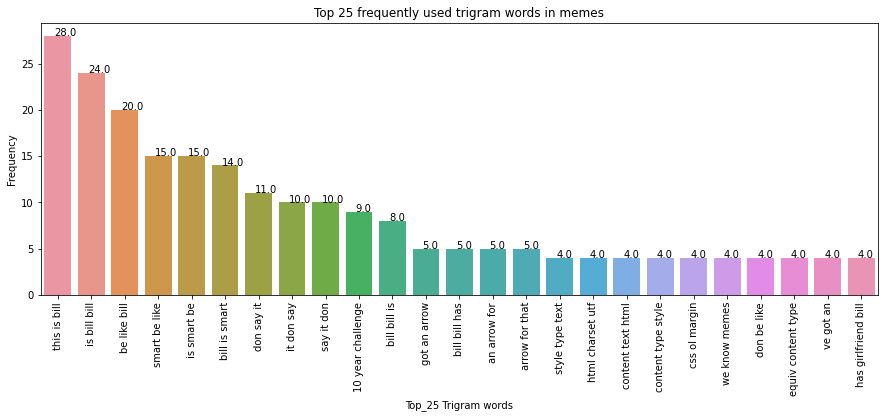

In [247]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.figure(figsize =(15,5))
plot = sb.barplot(DTM_sum_tri.head(25).index,DTM_sum_tri.head(25).values)
plt.xticks(rotation=90)
plt.xlabel('Top_25 Trigram words')
plt.ylabel('Frequency')
plt.title('Top 25 frequently used trigram words in memes')

for p in plot.patches:
        plot.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()))

plt.show()

In [223]:
def custom_encoder(df):
    df.replace(to_replace ="very_positive", value =1, inplace=True)
    df.replace(to_replace ="positive", value =1, inplace=True)
    df.replace(to_replace ="neutral", value =0, inplace=True)
    df.replace(to_replace ="negative", value =-1, inplace=True)
    df.replace(to_replace ="very_negative", value =-1, inplace=True)


In [224]:
custom_encoder(df['overall_sentiment'])

C:\Users\talha\AppData\Local\Temp\ipykernel_196\2875596900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace ="very_positive", value =1, inplace=True)
C:\Users\talha\AppData\Local\Temp\ipykernel_196\2875596900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace ="positive", value =1, inplace=True)
C:\Users\talha\AppData\Local\Temp\ipykernel_196\2875596900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [250]:
df.drop(index=df.index[0], axis=0, inplace=True)
df

C:\Users\talha\AppData\Local\Temp\ipykernel_196\3143119435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=df.index[0], axis=0, inplace=True)


,imgno,text_ocr,text_corrected,overall_sentiment
2.0,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3.0,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive
4.0,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral
5.0,image_6.jpg,"1998: ""Don't get in car with strangers"" 2008: ...","1998: ""Don't get in car with strangers"" 2008: ...",negative
6.0,image_7.png,10 years challenge is lit af Üs & B erg 1945 1...,10 years challenge is lit af Üs & B erg 1945 1...,negative
...,...,...,...,...
396.0,image_397.jpg,AND THE SUPERBOWL WINNERS ARE........ THE BUFF...,AND THE SUPERBOWL WINNERS ARE........ THE BUFF...,positive
397.0,image_398.png,This is Madison. Madison sees it's raining out...,This is Madison. Madison sees it's raining out...,positive
398.0,image_399.jpg,ONE DOES NOT SIMPLY PAY BILLS ON TIME n aganer...,ONE DOES NOT SIMPLY PAY BILLS ON TIME n aganer...,neutral
399.0,image_400.png,This is Bill. Bill has a girlfriend. Bill alwa...,This is Bill. Bill has a girlfriend. Bill alwa...,negative


In [251]:
c_data = df.overall_sentiment.value_counts()
c_data1 = c_data.reset_index()
c_data1.columns = ['overall sentiment', 'count']
c_data1

,overall sentiment,count
0,positive,180
1,neutral,125
2,very_positive,63
3,negative,20
4,very_negative,11


C:\Users\talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall_sentiment', ylabel='count'>

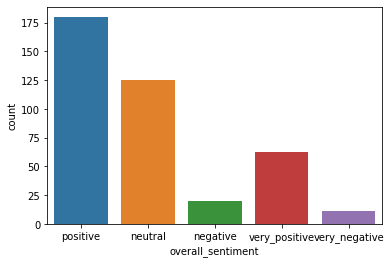

In [252]:
import seaborn as sns
sns.countplot(df.overall_sentiment)


# NAVIE Bayes

In [253]:
from sklearn.preprocessing import LabelEncoder

x1 = LabelEncoder()
df['encoded_classes'] = x1.fit_transform(df['overall_sentiment']) 
df.head(10)

C:\Users\talha\AppData\Local\Temp\ipykernel_196\1529993507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_classes'] = x1.fit_transform(df['overall_sentiment'])


,imgno,text_ocr,text_corrected,overall_sentiment,encoded_classes
2.0,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,2
3.0,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive,2
4.0,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,1
5.0,image_6.jpg,"1998: ""Don't get in car with strangers"" 2008: ...","1998: ""Don't get in car with strangers"" 2008: ...",negative,0
6.0,image_7.png,10 years challenge is lit af Üs & B erg 1945 1...,10 years challenge is lit af Üs & B erg 1945 1...,negative,0
7.0,image_8.jpg,10 Year Challenge emotional edition boredpanda...,10 Year Challenge emotional edition boredpanda...,neutral,1
8.0,image_9.jpg,Fornite died in 10 months but Minecraft never ...,Fornite died in 10 months but Minecraft never ...,positive,2
9.0,image_10.png,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,positive,2
10.0,image_11.jpg,PROBABLY THE FIRST MAN TO DO 10 YEAR CHALLENGE...,PROBABLY THE FIRST MAN TO DO 10 YEAR CHALLENGE...,negative,0
11.0,image_12.jpg,State Dining Room in the White House: 2009 vs....,State Dining Room in the White House: 2009 vs....,very_positive,4


In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_bi = TfidfVectorizer(ngram_range=(2,2), max_features=200)

Input_bigram= tfidf_vectorizer_bi.fit_transform(df['text_corrected'].values.astype(str))

DTM_bigram = pd.DataFrame(Input_bigram.toarray(),columns = tfidf_vectorizer_bi.get_feature_names())

DTM_bigram

C:\Users\talha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10 year,10 years,9gag com,about the,all the,an arrow,and have,and then,and you,anon 2018,...,you are,you can,you don,you get,you have,you just,you know,you re,you to,your own
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.707107,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.707107,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
395,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [271]:
X = df.text_corrected.values.astype(str)
target = df.encoded_classes.values

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.75,random_state=42)

In [273]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer_uni = TfidfVectorizer( max_features=5000)
X_train_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X_train)
X_test_tfidf_uni = tfidf_vectorizer_uni.transform(X_test)

In [274]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf_uni, y_train)
traget_prediction_uni = classifier.predict(X_test_tfidf_uni)
print("confusion matrix :", confusion_matrix(y_test,traget_prediction_uni),end="\n")
print("Accuracy of bigram_Tfidf_vector", accuracy_score(y_test,traget_prediction_uni)*100)

confusion matrix : [[ 0  0  5  0  0]
 [ 0  4 24  0  0]
 [ 0  7 44  0  0]
 [ 0  0  1  0  0]
 [ 0  0 15  0  0]]
Accuracy of bigram_Tfidf_vector 48.0


In [275]:
pd.Series(traget_prediction_uni).head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
dtype: int32

In [276]:
print(classification_report(y_test,traget_prediction_uni))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.36      0.14      0.21        28
           2       0.49      0.86      0.63        51
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        15

    accuracy                           0.48       100
   macro avg       0.17      0.20      0.17       100
weighted avg       0.35      0.48      0.38       100



C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [278]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_bi = TfidfVectorizer(ngram_range=(2,2), max_features=5000)
X_train_tfidf = tfidf_vectorizer_bi.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer_bi.transform(X_test)

print(X_train_tfidf.shape,X_test_tfidf.shape)

(299, 3612) (100, 3612)


In [279]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [280]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)
traget_prediction = classifier.predict(X_test_tfidf)
print("confusion matrix :", confusion_matrix(y_test,traget_prediction),end="\n")
print("Accuracy of bigram_Tfidf_vector", accuracy_score(y_test,traget_prediction)*100)

confusion matrix : [[ 0  0  5  0  0]
 [ 0  3 25  0  0]
 [ 0  8 43  0  0]
 [ 0  0  1  0  0]
 [ 0  0 15  0  0]]
Accuracy of bigram_Tfidf_vector 46.0


In [281]:
print(classification_report(y_test,traget_prediction))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.27      0.11      0.15        28
           2       0.48      0.84      0.61        51
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        15

    accuracy                           0.46       100
   macro avg       0.15      0.19      0.15       100
weighted avg       0.32      0.46      0.36       100



C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [282]:
tfidf_vectorizer_tri = TfidfVectorizer(ngram_range=(3,3), max_features=5000)
X_train_tfidf_tri = tfidf_vectorizer_tri.fit_transform(X_train)
X_test_tfidf_tri = tfidf_vectorizer_tri.transform(X_test)

In [283]:
print(X_train_tfidf.shape,X_test_tfidf.shape)

(299, 3612) (100, 3612)


In [284]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf_tri, y_train)
traget_prediction1 = classifier.predict(X_test_tfidf_tri)
print("confusion matrix :", confusion_matrix(y_test,traget_prediction1),sep="\n")
print("Accuracy of bigram_Tfidf_vector", accuracy_score(y_test,traget_prediction1)*100)

confusion matrix :
[[ 0  0  5  0  0]
 [ 0  0 28  0  0]
 [ 0  5 46  0  0]
 [ 0  0  1  0  0]
 [ 0  0 15  0  0]]
Accuracy of bigram_Tfidf_vector 46.0


In [285]:
print(classification_report(y_test,traget_prediction1))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        28
           2       0.48      0.90      0.63        51
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        15

    accuracy                           0.46       100
   macro avg       0.10      0.18      0.13       100
weighted avg       0.25      0.46      0.32       100



C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
p = pd.DataFrame([traget_prediction_uni,traget_prediction,traget_prediction1]).T
p.columns = ['1-gram','2-gram','3-gram']
p.groupby(['1-gram']).count()

# SVM

In [312]:
X1 = df.text_corrected.values.astype(str)
target1 = df.text_corrected.values.astype(str)

In [313]:
X_train1, X_test1, y_train1, y_test1 = \
    train_test_split(X1,target1, test_size = 0.20,random_state=42)


In [314]:
tfidf_vectorizer_uni = TfidfVectorizer(max_features=3000)
X_train_tfidf_uni = tfidf_vectorizer_uni.fit_transform(X_train1)
X_test_tfidf_uni = tfidf_vectorizer_uni.transform(X_test1)

In [315]:
svclassifier = SVC(C=1.0, kernel='linear', degree=8, gamma='auto')
svclassifier.fit(X_train_tfidf_uni, y_train1)

SVC(degree=8, gamma='auto', kernel='linear')

In [316]:
predictions_SVM_uni = svclassifier.predict(X_test_tfidf_uni)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_uni, y_test1)*100)
print("confusion matrix :", confusion_matrix(y_test1,predictions_SVM_uni),sep="\n")

SVM Accuracy Score ->  1.25
confusion matrix :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [317]:
print(classification_report(y_test1,predictions_SVM_uni))

                                                                                                                                                                                                                                                                                            precision    recall  f1-score   support

                                                                                                                                    * TELLS HIS KIDS ABOUT ALL THE TIMES THAT HE AND BARNEY BANGED CHICKS STILL THINKS THAT TALKING ABOUT MARIJUANA IS INDECENT memecenter.com Memetentera       0.00      0.00      0.00         1
                                                                                                                                    **CALLING ALL HEROES. WE'RE BATTLING THANOS AND NEED ALL THE HELP WE CAN GET WALKS BETWEEN BULLETS EH  WE'LL SIT THIS ONE OUT GETS HIT BY BULLETS .COM       0.00      0.00      0.00         1
                           

C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [318]:
tfidf_vectorizer_bi1 = TfidfVectorizer(ngram_range=(2,2), max_features=10000)
X_train_tfidf_bi1 = tfidf_vectorizer_bi1.fit_transform(X_train1)
X_test_tfidf_bi1 = tfidf_vectorizer_bi1.transform(X_test1)

In [319]:
svclassifier = SVC(C=1.0, kernel='linear', degree=8, gamma='auto')
svclassifier.fit(X_train_tfidf_bi1, y_train1)

SVC(degree=8, gamma='auto', kernel='linear')

In [320]:
predictions_SVM = svclassifier.predict(X_test_tfidf_bi1)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test1)*100)
print("confusion matrix :", confusion_matrix(y_test1,predictions_SVM),sep="\n")

SVM Accuracy Score ->  1.25
confusion matrix :
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [321]:
print(classification_report(y_test1,predictions_SVM))

                                                                                                                                                                                                                                                                                            precision    recall  f1-score   support

                                                                                                                                    * TELLS HIS KIDS ABOUT ALL THE TIMES THAT HE AND BARNEY BANGED CHICKS STILL THINKS THAT TALKING ABOUT MARIJUANA IS INDECENT memecenter.com Memetentera       0.00      0.00      0.00         1
                                                                                                                                    **CALLING ALL HEROES. WE'RE BATTLING THANOS AND NEED ALL THE HELP WE CAN GET WALKS BETWEEN BULLETS EH  WE'LL SIT THIS ONE OUT GETS HIT BY BULLETS .COM       0.00      0.00      0.00         1
                           

C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [322]:
tfidf_vectorizer_3 = TfidfVectorizer(ngram_range=(3,3), max_features=10000)
X_train_tfidf_3 = tfidf_vectorizer_3.fit_transform(X_train1)
X_test_tfidf_3 = tfidf_vectorizer_3.transform(X_test1)

In [323]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', degree=8, gamma='auto')
svclassifier.fit(X_train_tfidf_3, y_train1)

SVC(degree=8, gamma='auto', kernel='linear')

In [324]:
predictions_SVM1 = svclassifier.predict(X_test_tfidf_3)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM1, y_test1)*100)
print("confusion matrix :", confusion_matrix(y_test1,predictions_SVM1),sep="\n")

SVM Accuracy Score ->  1.25
confusion matrix :
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [325]:
print(classification_report(y_test1,predictions_SVM1))

                                                                                                                                                                                                                                                                                            precision    recall  f1-score   support

                                                                                                                                    * TELLS HIS KIDS ABOUT ALL THE TIMES THAT HE AND BARNEY BANGED CHICKS STILL THINKS THAT TALKING ABOUT MARIJUANA IS INDECENT memecenter.com Memetentera       0.00      0.00      0.00         1
                                                                                                                                    **CALLING ALL HEROES. WE'RE BATTLING THANOS AND NEED ALL THE HELP WE CAN GET WALKS BETWEEN BULLETS EH  WE'LL SIT THIS ONE OUT GETS HIT BY BULLETS .COM       0.00      0.00      0.00         1
                           

C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talha\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [326]:
Uni_NB =accuracy_score(y_test,traget_prediction_uni)*100
BI_NB = accuracy_score(y_test,traget_prediction)*100

Tri_NB = accuracy_score(y_test,traget_prediction1)*100

SVM_uni =accuracy_score(predictions_SVM_uni, y_test1)*100
SVM_BI = accuracy_score(predictions_SVM, y_test1)*100

SVM_TRI= accuracy_score(predictions_SVM1, y_test1)*100

In [333]:
scores = [Uni_NB,BI_NB,Tri_NB,SVM_uni,SVM_BI,SVM_TRI]
names = ['unigram','bigram','trigram','unigram','bigram','trigram']
model_names =['Navie Bayes','Navie Bayes','Navie Bayes','SVM','SVM','SVM']

accuracy_table = pd.DataFrame([model_names,names,scores]).T
accuracy_table.columns = ['model_name','N-gram','accuracy_score (%)']

In [334]:
accuracy_table['accuracy_score (%)'] = \
        accuracy_table['accuracy_score (%)'].apply(lambda x: x.astype(float))

In [335]:
table = accuracy_table.pivot_table(index='model_name', 
                columns = 'N-gram', values = 'accuracy_score (%)')
table

N-gram,bigram,trigram,unigram
model_name,,,
Navie Bayes,46.00,46.00,48.00
SVM,1.25,1.25,1.25


In [337]:
accuracy_table.groupby(['model_name'])[['N-gram','accuracy_score (%)']].mean()


,accuracy_score (%)
model_name,
Navie Bayes,46.666667
SVM,1.250000
